In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../mi-person/data/Sentiment.csv')
df = df.sample(7000)

In [4]:
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
6094,6095,No candidate mentioned,1.0,yes,1.0,Negative,0.7222,Religion,0.7222,NaN,...,NaN,8,NaN,NaN,RT @mjtbaum: GOD is making an appearance at th...,NaN,2015-08-07 08:25:32 -0700,629674743843696640,NaN,NaN
11997,11998,Donald Trump,1.0,yes,1.0,Negative,0.6483,FOX News or Moderators,1.0000,NaN,...,NaN,66,NaN,NaN,RT @RWSurferGirl: FOX News won't admit who the...,NaN,2015-08-06 19:27:45 -0700,629479008221032448,@gaelicsnp,Pacific Time (US & Canada)
7645,7646,Ted Cruz,1.0,yes,1.0,Negative,0.6733,None of the above,1.0000,NaN,...,NaN,0,NaN,NaN,#TedCruz reminded me of my Aunt Ethel sending ...,NaN,2015-08-07 08:01:45 -0700,629668760752914432,Philly,Eastern Time (US & Canada)
3513,3514,No candidate mentioned,1.0,yes,1.0,Neutral,0.6727,Religion,1.0000,NaN,...,NaN,0,NaN,NaN,#GOPDebate it might be safe to say NONE of the...,NaN,2015-08-07 09:17:55 -0700,629687927258382336,NaN,NaN
12524,12525,No candidate mentioned,1.0,yes,1.0,Negative,0.6855,FOX News or Moderators,1.0000,NaN,...,NaN,155,NaN,NaN,RT @RWSurferGirl: Fox News is obviously trying...,NaN,2015-08-06 19:20:06 -0700,629477082192437248,"Phoenix, Arizona",Arizona


In [4]:
df.shape

(7000, 31)

In [5]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.4
4.8


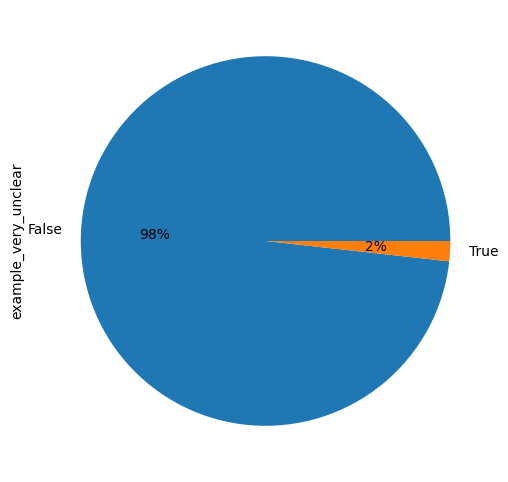

In [6]:
df.example_very_unclear.value_counts().plot(kind='pie', autopct='%1.0f%%');

In [7]:
X = df.drop(columns=['id', 'example_very_unclear'])
X.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
77334,I’m not curious why you think it’s relevant to...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
109396,I won’t but if I tell him to have a threesome ...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
129379,"Speaking *of* bias, there's probably a good re...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
107378,"Congratulations, the most poorly written video...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151835,Thank you deeply for these words!,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
77334,I’m not curious why you think it’s relevant to...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
109396,I won’t but if I tell him to have a threesome ...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
129379,"Speaking *of* bias, there's probably a good re...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
107378,"Congratulations, the most poorly written video...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151835,Thank you deeply for these words!,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
import re


processed_features = []

for sentence in range(0, len('?????')):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str('????'[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [ ]:
# TF  = (Frequency of a word in the document)/(Total words in the document)
# IDF = Log((Total number of docs)/(Number of docs containing the word))

In [41]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [42]:
processed_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, '????', test_size=0.3, random_state=0)

In [50]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
# text_classifier.fit(X_train, y_train)

TypeError: '<' not supported between instances of 'int' and 'str'

In [47]:
predictions = text_classifier.predict(X_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(confusion_matrix(y_test.argmax(axis=1),predictions.argmax(axis=1)))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.11      0.02      0.04       130
           1       0.00      0.00      0.00        89
           2       0.00      0.00      0.00        80
           3       0.00      0.00      0.00       136
           4       0.07      0.01      0.02       177
           5       0.00      0.00      0.00        66
           6       0.00      0.00      0.00        63
           7       0.00      0.00      0.00        97
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00        79
          10       0.00      0.00      0.00       125
          11       0.00      0.00      0.00        53
          12       0.00      0.00      0.00        35
          13       0.00      0.00      0.00        59
          14       0.00      0.00      0.00        23
          15       0.11      0.01      0.02       116
          16       0.00      0.00      0.00         7
          17       0.14    

/home/tatchiwiggers/.pyenv/versions/3.8.12/envs/mi-person/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tatchiwiggers/.pyenv/versions/3.8.12/envs/mi-person/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tatchiwiggers/.pyenv/versions/3.8.12/envs/mi-person/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this